<a href="https://colab.research.google.com/github/Mostafa-Mohamed-Atef/movies-data-science/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [319]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [320]:
data = pd.read_csv('/content/cleaned_movies .csv')
data

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
0,2013,tt1711425,21 &amp; over,notalk,notalk,0,13000000,25682380,42195766,2013fail,13000000,25682380,42195766,1,1
1,2012,tt1343727,dredd 3d,ok-disagree,ok,1,45000000,13414714,40868994,2012pass,45658735,13611086,41467257,1,1
2,2013,tt2024544,12 years a slave,notalk-disagree,notalk,0,20000000,53107035,158607035,2013fail,20000000,53107035,158607035,1,1
3,2013,tt1272878,2 guns,notalk,notalk,0,61000000,75612460,132493015,2013fail,61000000,75612460,132493015,1,1
4,2013,tt0453562,42,men,men,0,40000000,95020213,95020213,2013fail,40000000,95020213,95020213,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751,1971,tt0067741,shaft,notalk,notalk,0,53012938,70327868,107190108,1971fail,305063707,404702718,616827003,9,5
1752,1971,tt0067800,straw dogs,notalk,notalk,0,25000000,10324441,11253821,1971fail,143862856,59412143,64760273,9,5
1753,1971,tt0067116,the french connection,notalk,notalk,0,2200000,41158757,41158757,1971fail,12659931,236848653,236848653,9,5
1754,1971,tt0067992,willy wonka &amp; the chocolate factory,men-disagree,men,0,3000000,4000000,4000000,1971fail,17263543,23018057,23018057,9,5


In [321]:
data.columns

Index(['year', 'imdb', 'title', 'test', 'clean_test', 'binary', 'budget',
       'domgross', 'intgross', 'code', 'budget_2013$', 'domgross_2013$',
       'intgross_2013$', 'period code', 'decade code'],
      dtype='object')

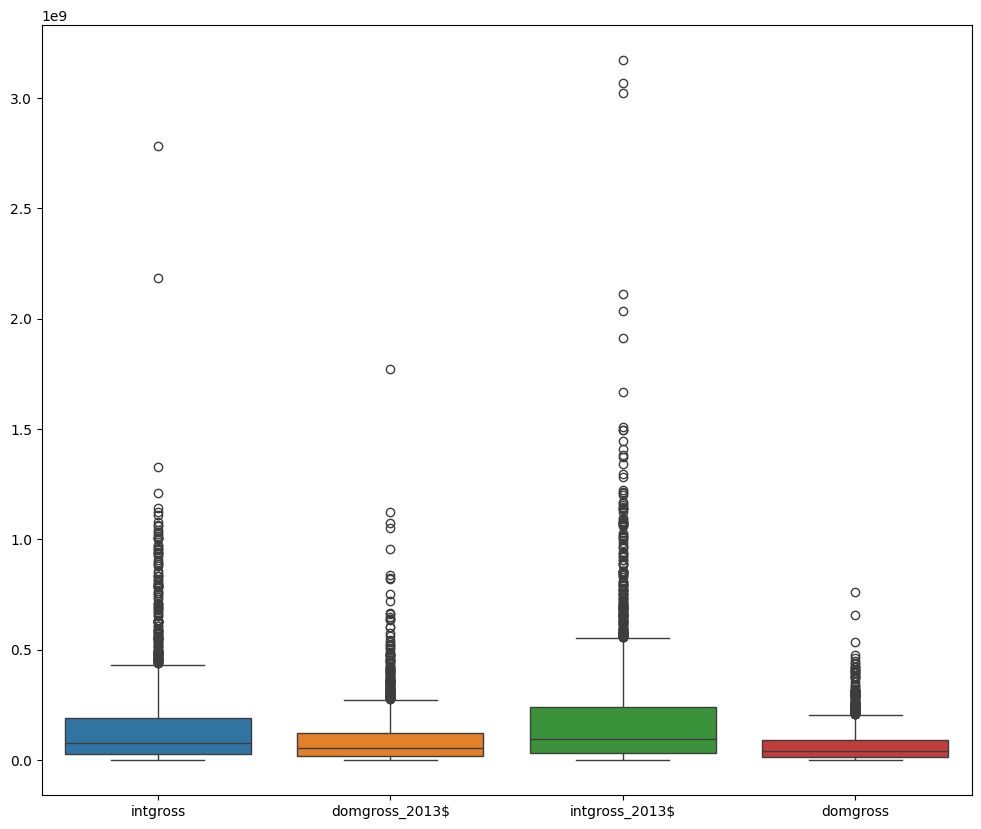

In [322]:
plt.figure(figsize=[12,10])
sns.boxplot(data[['intgross','domgross_2013$',
       'intgross_2013$','domgross']])
plt.show()

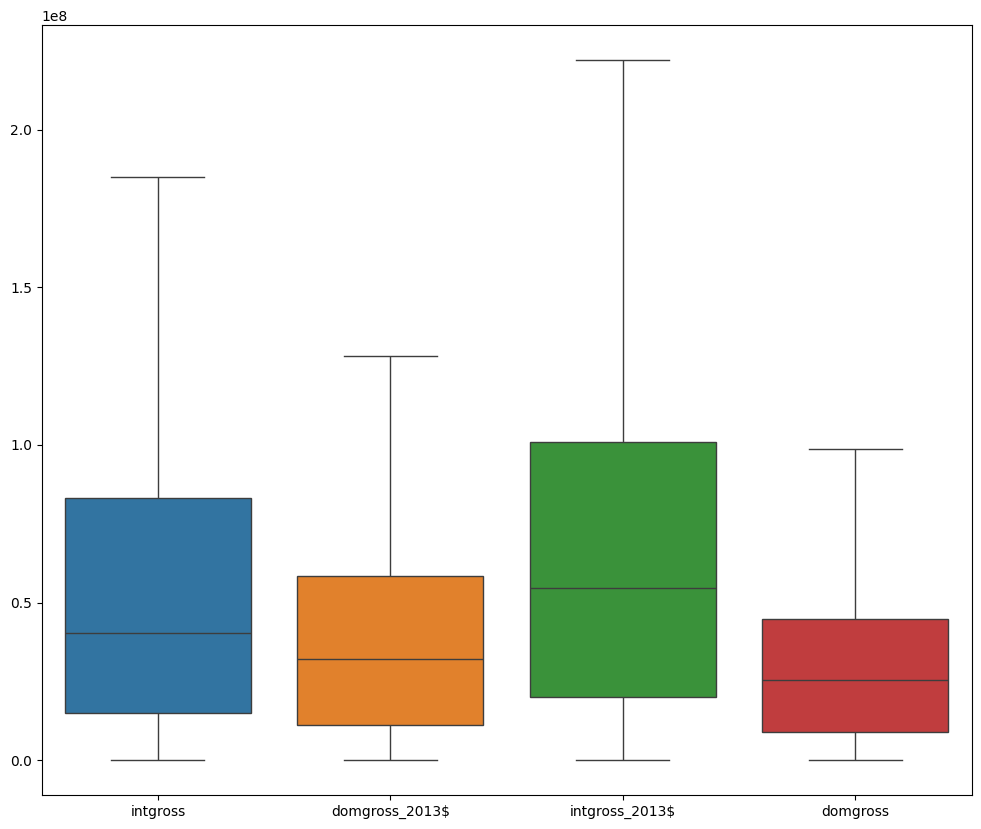

In [342]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    data_no_outliers = data[(data[column] >= (Q1 - 1.5 * IQR)) & (data[column] <= (Q3 + 1.5 * IQR))]
    return data_no_outliers

# Iteratively remove outliers from all columns
columns = ['intgross', 'domgross_2013$', 'intgross_2013$', 'domgross']
for column in columns:
    data = remove_outliers_iqr(data, column)

plt.figure(figsize=(12, 10))
sns.boxplot(data[columns])
plt.show()

<Axes: >

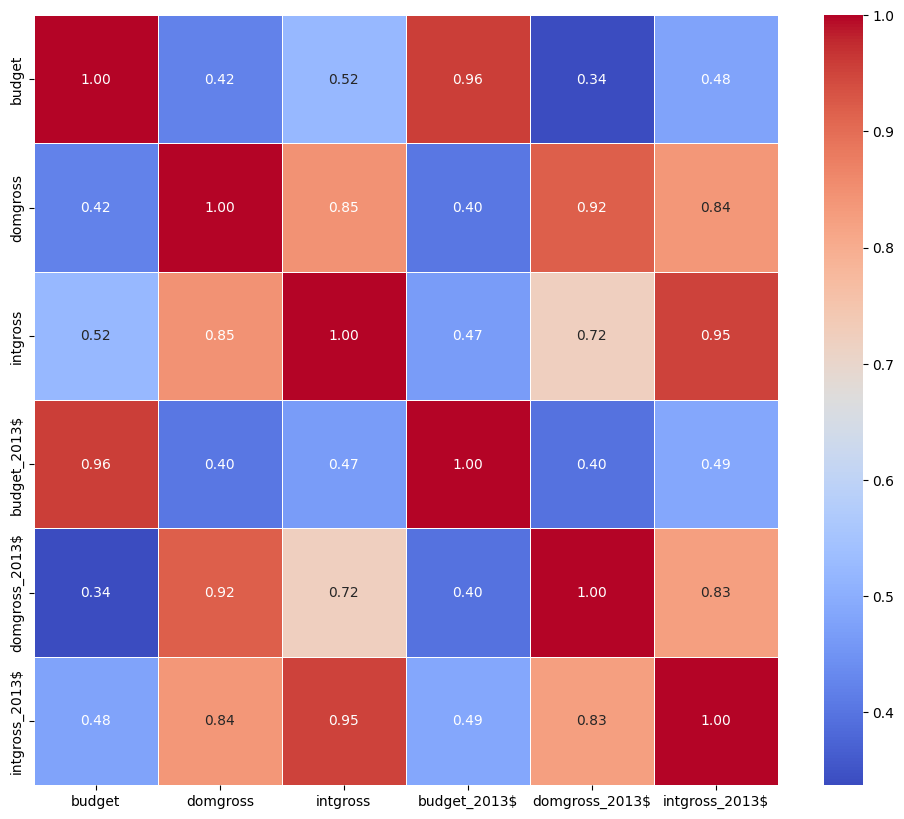

In [343]:
numerical_columns = [
'budget',
       'domgross', 'intgross','budget_2013$', 'domgross_2013$',
       'intgross_2013$'
]

correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [344]:
x = data[['intgross','domgross_2013$',
       'intgross_2013$']]
y = data['domgross'].values

In [345]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=44,shuffle = True)

print('x_train : ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train : ',y_train.shape)
print('y_test : ',y_test.shape)

x_train :  (903, 3)
x_test:  (302, 3)
y_train :  (903,)
y_test :  (302,)


In [346]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)


linear_regression_model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1)
linear_regression_model.fit(x_train_normalized, y_train)


LinearRegression(n_jobs=-1)

In [347]:
print(linear_regression_model.score(x_train_normalized,y_train))
print(linear_regression_model.score(x_test_normalized,y_test))

0.9763889056154758
0.9676831231782812


In [348]:
y_pred = linear_regression_model.predict(x_test_normalized)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error ,r2_score

mae = mean_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean absolute error is {mae}")
mse = mean_squared_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean squared error is {mse}")
mde = median_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"median absolute error is {mde}")
r2 = r2_score(y_test,y_pred)
print(f"the r2 score {r2}")

mean absolute error is 2252294.6547471755
mean squared error is 17419987612588.629
median absolute error is 1187547.6312718894
the r2 score 0.9676831231782812


In [349]:
from sklearn.tree import DecisionTreeRegressor

DTM = DecisionTreeRegressor(max_depth=10,random_state=33)
DTM.fit(x_train_normalized,y_train)

print(DTM.score(x_train_normalized,y_train))
print(DTM.score(x_test_normalized,y_test))

0.9976776900029415
0.9552740127376466


In [350]:
y_pred = DTM.predict(x_test_normalized)

mae = mean_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean absolute error is {mae}")
mse = mean_squared_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean squared error is {mse}")
mde = median_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"median absolute error is {mde}")
r2 = r2_score(y_test,y_pred)
print(f"the r2 score {r2}")

mean absolute error is 2912070.4757306166
mean squared error is 24108955465256.367
median absolute error is 1149231.5
the r2 score 0.9552740127376466


In [351]:
from sklearn.neighbors import KNeighborsRegressor

CLF = KNeighborsRegressor(11)
CLF.fit(x_train_normalized,y_train)


KNeighborsRegressor(n_neighbors=11)

In [352]:
print(CLF.score(x_train_normalized,y_train))
print(CLF.score(x_test_normalized,y_test))

0.9756361505752391
0.9708158753388572


In [353]:
y_pred = CLF.predict(x_test_normalized)

In [354]:
mae = mean_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean absolute error is {mae}")
mse = mean_squared_error(y_test,y_pred,multioutput='uniform_average')
print(f"mean squared error is {mse}")
mde = median_absolute_error(y_test,y_pred,multioutput='uniform_average')
print(f"median absolute error is {mde}")
r2 = r2_score(y_test,y_pred)
print(f"the r2 score {r2}")

mean absolute error is 2541989.2459361823
mean squared error is 15731318743638.139
median absolute error is 1673516.4090909073
the r2 score 0.9708158753388572


In [356]:
data['code'] = data['code'].str[4:]
data['code'].value_counts()

code
fail    624
pass    581
Name: count, dtype: int64

In [357]:
dummies = data.copy()
dummies

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
0,2013,tt1711425,21 &amp; over,notalk,notalk,0,13000000,25682380,42195766,fail,13000000,25682380,42195766,1,1
1,2012,tt1343727,dredd 3d,ok-disagree,ok,1,45000000,13414714,40868994,pass,45658735,13611086,41467257,1,1
2,2013,tt2024544,12 years a slave,notalk-disagree,notalk,0,20000000,53107035,158607035,fail,20000000,53107035,158607035,1,1
3,2013,tt1272878,2 guns,notalk,notalk,0,61000000,75612460,132493015,fail,61000000,75612460,132493015,1,1
4,2013,tt0453562,42,men,men,0,40000000,95020213,95020213,fail,40000000,95020213,95020213,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,1972,tt0069089,pink flamingos,ok,ok,1,12000,413802,413802,pass,66866,2305762,2305762,9,5
1750,1971,tt0067065,escape from the planet of the apes,notalk,notalk,0,2500000,12300000,12300000,fail,14386286,70780525,70780525,9,5
1752,1971,tt0067800,straw dogs,notalk,notalk,0,25000000,10324441,11253821,fail,143862856,59412143,64760273,9,5
1754,1971,tt0067992,willy wonka &amp; the chocolate factory,men-disagree,men,0,3000000,4000000,4000000,fail,17263543,23018057,23018057,9,5


In [363]:
d = pd.get_dummies(dummies.code)
d['fail'] = d['fail'].astype(int)
d['pass'] = d['pass'].astype(int)


In [364]:
d

,fail,pass
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
1748,0,1
1750,1,0
1752,1,0
1754,1,0


In [379]:
input_data = pd.concat([data,d],axis='columns')
input_data

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code,fail,pass
0,2013,tt1711425,21 &amp; over,notalk,notalk,0,13000000,25682380,42195766,fail,13000000,25682380,42195766,1,1,1,0
1,2012,tt1343727,dredd 3d,ok-disagree,ok,1,45000000,13414714,40868994,pass,45658735,13611086,41467257,1,1,0,1
2,2013,tt2024544,12 years a slave,notalk-disagree,notalk,0,20000000,53107035,158607035,fail,20000000,53107035,158607035,1,1,1,0
3,2013,tt1272878,2 guns,notalk,notalk,0,61000000,75612460,132493015,fail,61000000,75612460,132493015,1,1,1,0
4,2013,tt0453562,42,men,men,0,40000000,95020213,95020213,fail,40000000,95020213,95020213,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,1972,tt0069089,pink flamingos,ok,ok,1,12000,413802,413802,pass,66866,2305762,2305762,9,5,0,1
1750,1971,tt0067065,escape from the planet of the apes,notalk,notalk,0,2500000,12300000,12300000,fail,14386286,70780525,70780525,9,5,1,0
1752,1971,tt0067800,straw dogs,notalk,notalk,0,25000000,10324441,11253821,fail,143862856,59412143,64760273,9,5,1,0
1754,1971,tt0067992,willy wonka &amp; the chocolate factory,men-disagree,men,0,3000000,4000000,4000000,fail,17263543,23018057,23018057,9,5,1,0


from matplotlib import pyplot as plt
input_data['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
input_data['binary'].plot(kind='hist', bins=20, title='binary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
input_data['budget'].plot(kind='hist', bins=20, title='budget')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
input_data['domgross'].plot(kind='hist', bins=20, title='domgross')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
input_data.groupby('clean_test').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
input_data.plot(kind='scatter', x='year', y='binary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
input_data.plot(kind='scatter', x='binary', y='budget', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
input_data.plot(kind='scatter', x='budget', y='domgross', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
input_data.plot(kind='scatter', x='domgross', y='intgross', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['binary']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = input_data.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('clean_test')):
  _plot_series(series, series_name, i)
  fig.legend(title='clean_test', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('binary')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['budget']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = input_data.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('clean_test')):
  _plot_series(series, series_name, i)
  fig.legend(title='clean_test', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('budget')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['domgross']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = input_data.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('clean_test')):
  _plot_series(series, series_name, i)
  fig.legend(title='clean_test', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('domgross')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['intgross']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = input_data.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('clean_test')):
  _plot_series(series, series_name, i)
  fig.legend(title='clean_test', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('intgross')

from matplotlib import pyplot as plt
input_data['year'].plot(kind='line', figsize=(8, 4), title='year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
input_data['binary'].plot(kind='line', figsize=(8, 4), title='binary')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
input_data['budget'].plot(kind='line', figsize=(8, 4), title='budget')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
input_data['domgross'].plot(kind='line', figsize=(8, 4), title='domgross')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(input_data['clean_test'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(input_data, x='year', y='clean_test', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(input_data['clean_test'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(input_data, x='binary', y='clean_test', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(input_data['clean_test'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(input_data, x='budget', y='clean_test', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(input_data['clean_test'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(input_data, x='domgross', y='clean_test', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

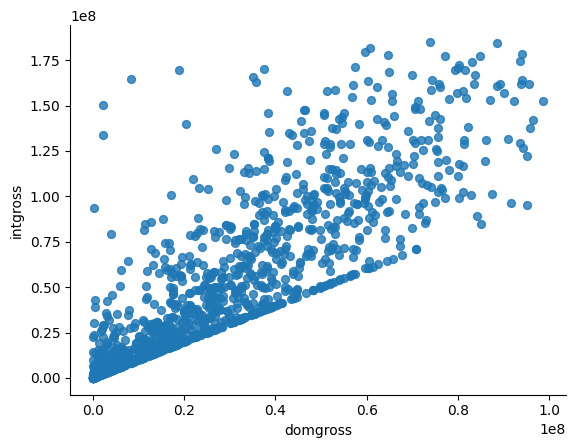

In [387]:
from matplotlib import pyplot as plt
input_data.plot(kind='scatter', x='domgross', y='intgross', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [380]:
input_data.drop(columns=['code'],inplace=True)

In [382]:
input_data_num = input_data[['year','binary','budget', 'intgross', 'budget_2013$', 'domgross_2013$',
       'intgross_2013$', 'period code', 'decade code','fail','pass']]



In [383]:
input_data_num

,year,binary,budget,intgross,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code,fail,pass
0,2013,0,13000000,42195766,13000000,25682380,42195766,1,1,1,0
1,2012,1,45000000,40868994,45658735,13611086,41467257,1,1,0,1
2,2013,0,20000000,158607035,20000000,53107035,158607035,1,1,1,0
3,2013,0,61000000,132493015,61000000,75612460,132493015,1,1,1,0
4,2013,0,40000000,95020213,40000000,95020213,95020213,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1748,1972,1,12000,413802,66866,2305762,2305762,9,5,0,1
1750,1971,0,2500000,12300000,14386286,70780525,70780525,9,5,1,0
1752,1971,0,25000000,11253821,143862856,59412143,64760273,9,5,1,0
1754,1971,0,3000000,4000000,17263543,23018057,23018057,9,5,1,0


#Classification

In [415]:
input_data_num

,year,binary,budget,intgross,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code,fail,pass
0,2013,0,13000000,42195766,13000000,25682380,42195766,1,1,1,0
1,2012,1,45000000,40868994,45658735,13611086,41467257,1,1,0,1
2,2013,0,20000000,158607035,20000000,53107035,158607035,1,1,1,0
3,2013,0,61000000,132493015,61000000,75612460,132493015,1,1,1,0
4,2013,0,40000000,95020213,40000000,95020213,95020213,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1748,1972,1,12000,413802,66866,2305762,2305762,9,5,0,1
1750,1971,0,2500000,12300000,14386286,70780525,70780525,9,5,1,0
1752,1971,0,25000000,11253821,143862856,59412143,64760273,9,5,1,0
1754,1971,0,3000000,4000000,17263543,23018057,23018057,9,5,1,0


In [416]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
input_data_num['fail_encoded'] = le.fit_transform(dummies['fail'])
input_data_num['pass_encoded'] = le.fit_transform(dummies['pass'])



<ipython-input-416-8b9c6d089e99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data_num['fail_encoded'] = le.fit_transform(dummies['fail'])
<ipython-input-416-8b9c6d089e99>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data_num['pass_encoded'] = le.fit_transform(dummies['pass'])


In [450]:
import numpy as np
target_variable = 'domgross'
#features = ['fail_encoded','pass_encoded']
x = data['intgross'].values.reshape(-1,1)
y = data[target_variable]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=44, shuffle=True)

In [451]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

clf = GaussianNB()
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)
print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))
# print(classification_report(y_test,y_pred))

0.9988925802879292
0.019867549668874173


In [452]:
from sklearn import tree

In [453]:
model = tree.DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=9,random_state=10)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=9, random_state=10)

In [454]:
model.feature_importances_

array([1.])

In [456]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.05204872646733112
0.0033112582781456954


In [458]:
y_pred = model.predict(x_test)


In [459]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.0033112582781456954

<Axes: xlabel='domgross', ylabel='intgross'>

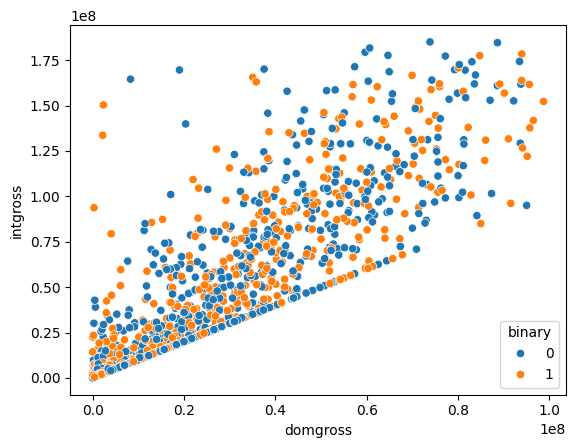

In [460]:
sns.scatterplot(x=data['domgross'],y=data['intgross'], hue=data['binary'])

In [461]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [462]:
y_pred = knn.predict(x_test)

In [463]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.009933774834437087
